In [7]:
# ======================================
# IMPORT LIBRARY (COLAB 2)
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [9]:
# ======================================
# LOAD DATASET KE DALAM MODEL
# ======================================

import pandas as pd

df = pd.read_csv("/content/data_clean_ready_for_model.csv")

print("Jumlah baris dan kolom:", df.shape)
display(df.head())

Jumlah baris dan kolom: (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,-1.729596,-1.186915,0,2,10,0.224201,1,1,-0.327638,-0.205520,1,0.157063,0.985550
1,-1.724682,0.958662,1,0,39,-2.244892,7,0,0.560423,1.605628,2,-2.976790,-2.166958
2,-1.719768,-0.471723,0,2,102,0.861386,6,1,-1.659730,-1.111095,0,1.201681,1.616052
3,-1.714855,-1.902108,1,1,101,-1.528059,11,0,0.116393,0.700054,2,-1.932172,-1.536456
4,-1.709941,0.243470,1,0,18,-0.333336,0,1,-0.771668,-0.205520,1,-0.887554,0.355048


In [10]:
# ======================================
# CEK KOLOM TARGET KECANDUAN
# ======================================


print("Kolom dalam dataset:")
print(df.columns)


Kolom dalam dataset:
Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


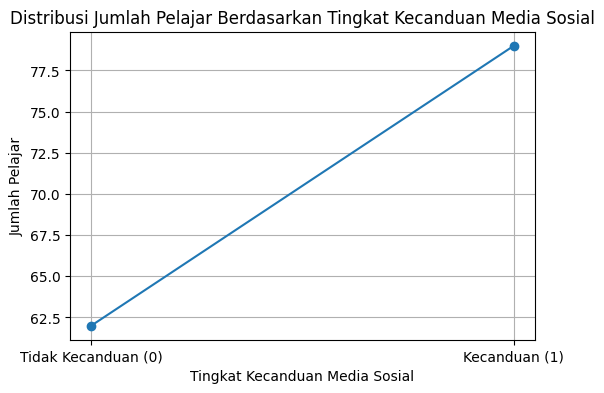

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(
    addiction_counts.index,
    addiction_counts.values,
    marker='o'
)

plt.xticks([0, 1], ["Tidak Kecanduan (0)", "Kecanduan (1)"])
plt.xlabel("Tingkat Kecanduan Media Sosial")
plt.ylabel("Jumlah Pelajar")
plt.title("Distribusi Jumlah Pelajar Berdasarkan Tingkat Kecanduan Media Sosial")
plt.grid(True)
plt.show()


In [11]:
# ======================================
# MENENTUKAN TARGET DAN FITUR
# ======================================

TARGET = "Addicted_Score"

X = df.drop(columns=[TARGET])
y = df[TARGET]

print("Jumlah fitur perilaku & sosial:", X.shape[1])
print("Distribusi status kecanduan:")
display(y.value_counts())

Jumlah fitur perilaku & sosial: 12
Distribusi status kecanduan:


,count
Addicted_Score,
0.355048,209
0.985550,144
-0.905955,136
-1.536456,83
-0.275453,61
1.616052,55
-2.166958,16
-2.797459,1


In [12]:
# ======================================
# SPLIT DATA & STANDARDISASI FITUR
# ======================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# ======================================
# MODEL BASELINE: LOGISTIC REGRESSION
# ======================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert continuous Addicted_Score to binary classes (e.g., 0 and 1)
# Assuming a threshold of 0 for binarization, adjust if domain knowledge suggests otherwise.
y_train_binary = (y_train >= 0).astype(int)
y_test_binary = (y_test >= 0).astype(int)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_binary)

y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test_binary, y_pred_lr)

print("Akurasi Logistic Regression:", acc_lr)


Akurasi Logistic Regression: 0.9716312056737588


In [14]:
# ======================================
# TABEL EVALUASI PERBANDINGAN MODEL
# ======================================

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Decision Tree model to define acc_dt
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_binary)
y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test_binary, y_pred_dt)

tabel_evaluasi = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree"
    ],
    "Accuracy": [
        acc_lr,
        acc_dt
    ]
})

display(tabel_evaluasi)


,Model,Accuracy
0,Logistic Regression,0.971631
1,Decision Tree,0.992908


In [15]:
# ======================================
# SIMPAN TABEL EVALUASI KE FILE
# ======================================

tabel_evaluasi.to_csv(
    "tabel_evaluasi_kecanduan_media_sosial.csv",
    index=False
)

print("Tabel evaluasi berhasil disimpan.")


Tabel evaluasi berhasil disimpan.


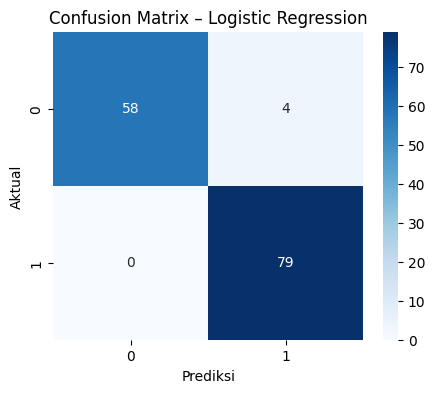

In [16]:
#VISUALISASI CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test_binary, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


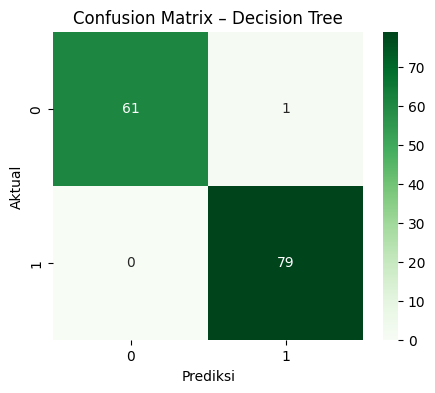

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test_binary, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix – Decision Tree")
plt.show()

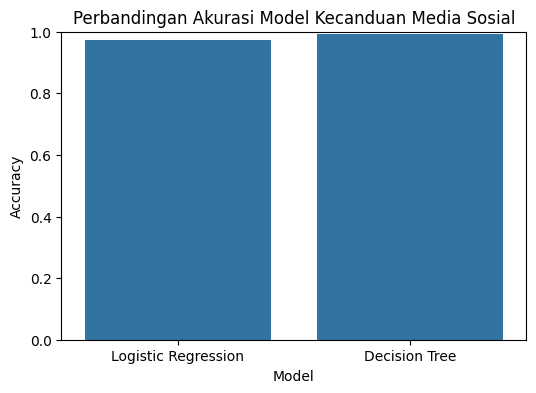


Interpretasi:
Grafik menunjukkan perbandingan performa dua model klasifikasi dalam
memprediksi kecanduan media sosial pada pelajar. Perbedaan akurasi
menunjukkan bahwa karakteristik perilaku penggunaan dan hubungan sosial
dalam dataset memiliki pola yang dapat ditangkap baik secara linier
maupun non-linier.



In [ ]:
# ======================================
# GRAFIK PERBANDINGAN AKURASI
# ======================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=tabel_evaluasi)
plt.title("Perbandingan Akurasi Model Kecanduan Media Sosial")
plt.ylim(0,1)
plt.show()

print("""
Interpretasi:
Grafik menunjukkan perbandingan performa dua model klasifikasi dalam
memprediksi kecanduan media sosial pada pelajar. Perbedaan akurasi
menunjukkan bahwa karakteristik perilaku penggunaan dan hubungan sosial
dalam dataset memiliki pola yang dapat ditangkap baik secara linier
maupun non-linier.
""")

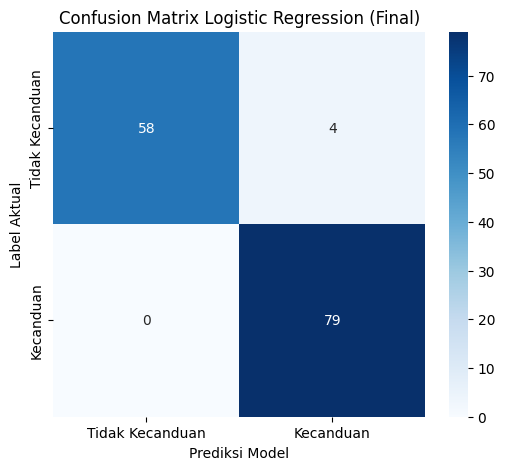

Akurasi Model Logistic Regression: 0.9716

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.95      1.00      0.98        79

    accuracy                           0.97       141
   macro avg       0.98      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [17]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test_binary, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Tidak Kecanduan", "Kecanduan"],
    yticklabels=["Tidak Kecanduan", "Kecanduan"]
)
plt.xlabel("Prediksi Model")
plt.ylabel("Label Aktual")
plt.title("Confusion Matrix Logistic Regression (Final)")
plt.show()

# ------------------------------------------------------
# 8. METRIK TAMBAHAN
# ------------------------------------------------------
accuracy = accuracy_score(y_test_binary, y_pred_lr)
print("Akurasi Model Logistic Regression:", round(accuracy, 4))

print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_lr))